In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
%matplotlib inline

In [2]:
cap = cv2.VideoCapture(0)
cap.set(3, 1920)
cap.set(4, 1080)
for _ in range(50):
    cap.read()
    time.sleep(0.05)
ret, frame = cap.read()

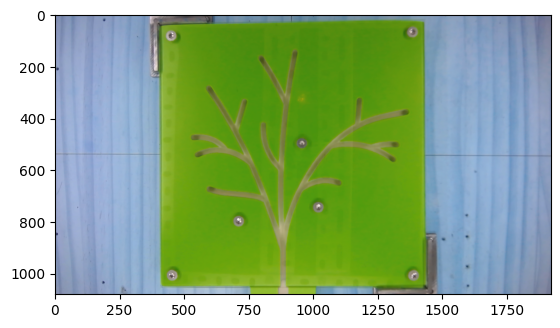

In [3]:
plt.imshow(frame)

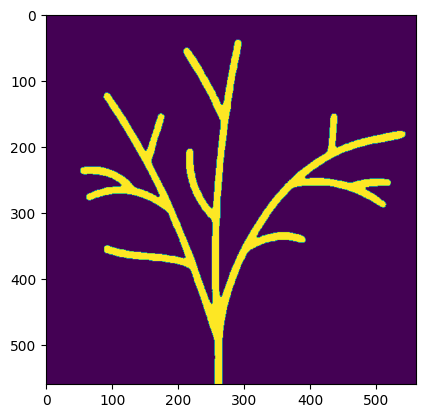

In [8]:
# point2, point1, point3, point4 = (413, 35), (420, 1044), (1435, 1051), (1426, 27)
# point2, point1, point3, point4 = (403, 42), (410, 1048), (1428, 1057), (1423, 27)
# M = cv2.getPerspectiveTransform(np.float32([point2, point1, point3, point4]),
#                                 np.float32([(0, 0), (0, 600), (600, 600), (600, 0)]))
# background = cv2.warpPerspective(frame, M, (600, 600))[20:-20, 20:-20]
background = cv2.imread('0.jpg')
# vessel = background[:, :, 2] / background[:, :, 1] > 0.5
vessel = (background[:, :, 1] - background[:, :, 2]) < 80

mask = np.ones_like(vessel)
mask[:, 0:25] = 0
# mask[-20:, 0:20] = 0
mask[0:20, -20:] = 0
mask[-30:, -30:] = 0
mask[410:450, 140:180] = 0
mask[380:420, 320:360] = 0
mask[230:270, 280:320] = 0
vessel = mask * vessel

vessel = vessel.astype(np.uint8)
plt.imshow(vessel)
# (-camera_init['vessel'].astype(int) + vessel.astype(int)).sum()

In [10]:
cv2.imwrite('1.jpg', frame)

True

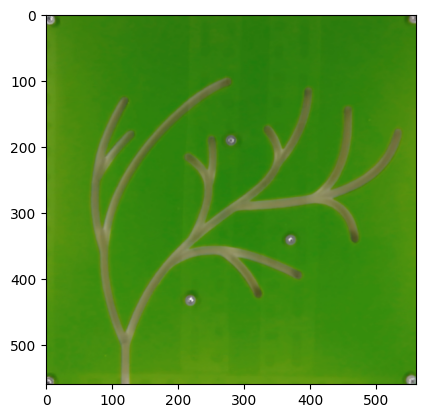

In [94]:
background = cv2.warpPerspective(frame, M, (600, 600))[20:-20, 20:-20]
# plt.imshow(background)

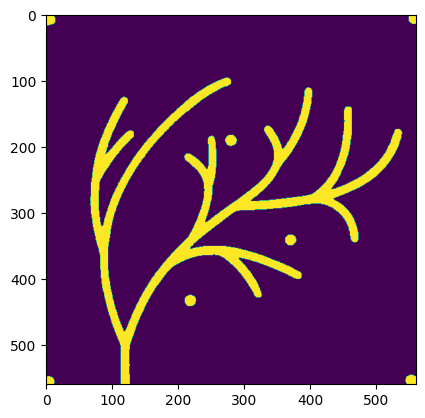

In [95]:
vessel = background[:, :, 2] / background[:, :, 1] > 0.25
plt.imshow(vessel)

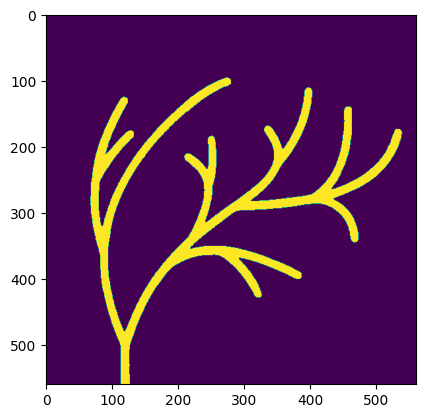

In [96]:
mask = np.ones_like(vessel)
mask[0:20, 0:20] = 0
mask[-20:, 0:20] = 0
mask[0:20, -20:] = 0
mask[-20:, -20:] = 0
mask[170:200, 260:290] = 0
mask[320:360, 360:390] = 0
mask[410:450, 200:240] = 0

vessel = mask * vessel
vessel = vessel.astype(np.uint8)
plt.imshow(vessel)

In [97]:
camera_init = torch.load('camera_log/camera_init.pt')
vessel = torch.load('camera_log/vessel.pt')
differ = torch.load('camera_log/differ.pt')
background = torch.load('camera_log/background.pt')

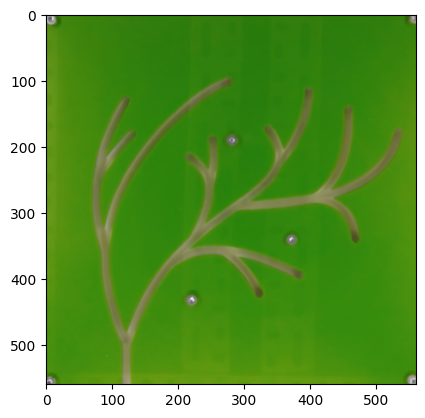

In [98]:
plt.imshow(background)

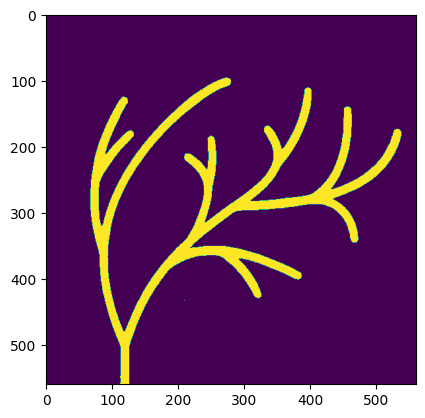

In [99]:
plt.imshow(camera_init['vessel'])

In [100]:
(vessel>camera_init['vessel']).sum()

2815

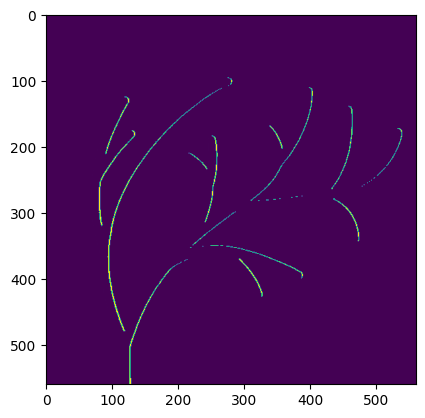

In [101]:
plt.imshow(-vessel+camera_init['vessel'])

In [10]:
differ.sum()

6477

In [9]:
560*560

313600

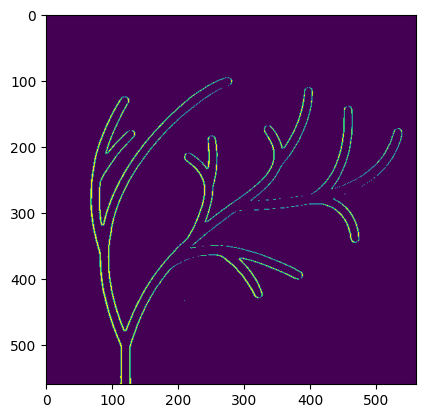

In [11]:
plt.imshow(differ)